In [673]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [674]:
bronx_df = pd.read_csv(f'/Users/alina.riabushenko/Documents/Унік/4курс_1сем/DS/Lab2/lab2Project/rollingsales_bronx.csv', sep=',')
brooklyn_df = pd.read_csv(f'/Users/alina.riabushenko/Documents/Унік/4курс_1сем/DS/Lab2/lab2Project/rollingsales_brooklyn.csv', sep=',')
manhattan_df = pd.read_csv(f'/Users/alina.riabushenko/Documents/Унік/4курс_1сем/DS/Lab2/lab2Project/rollingsales_manhattan.csv', sep=',')
queens_df = pd.read_csv(f'/Users/alina.riabushenko/Documents/Унік/4курс_1сем/DS/Lab2/lab2Project/rollingsales_queens.csv', sep=',')
staten_island_df = pd.read_csv(f'/Users/alina.riabushenko/Documents/Унік/4курс_1сем/DS/Lab2/lab2Project/rollingsales_statenisland.csv', sep=',')


In [675]:
new_york = pd.concat([bronx_df, brooklyn_df, manhattan_df, queens_df, staten_island_df], axis=0, ignore_index=True)
new_york


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1,0.0,1,"1,842","2,048",1901.0,1,A1,"655,000",11/1/2022
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1,0.0,1,"1,646","1,497",1899.0,1,A1,"215,000",4/18/2023
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1,0.0,1,"1,646","1,497",1899.0,1,A1,"570,000",8/23/2023
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1,0.0,1,"1,782","1,548",1899.0,1,A1,0,4/14/2023
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2,0.0,2,"1,658","1,428",1901.0,1,B9,"350,000",6/26/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,"2,603",0,2022.0,1,V0,"1,116,638",12/19/2022
73301,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,"2,551",0,NaN,1,V0,"1,116,638",12/19/2022
73302,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,"2,597",0,2023.0,1,V0,"1,116,638",12/19/2022
73303,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,"2,644",0,2023.0,1,V0,"1,116,638",12/19/2022


In [676]:
new_york.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASEMENT                          float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [677]:
def clear_data(df):
    df = df.drop_duplicates()

    df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

    nums_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
    for column in nums_columns:
        df[column] = pd.to_numeric(df[column].str.replace(',', ''))

    return df



In [678]:
new_york = clear_data(new_york)
manhattan_df = clear_data(manhattan_df)
staten_island_df = clear_data(staten_island_df)
bronx_df = clear_data(bronx_df)
brooklyn_df = clear_data(brooklyn_df)

In [679]:
new_york.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASEMENT                                 float64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                          object
TOTAL UNITS                               object
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

In [680]:
print(new_york.isnull().sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
EASEMENT                          73305
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
APARTMENT NUMBER                  55608
ZIP CODE                              5
RESIDENTIAL UNITS                 17833
COMMERCIAL UNITS                  31037
TOTAL UNITS                       15504
LAND SQUARE FEET                  33366
GROSS SQUARE FEET                 33366
YEAR BUILT                         4875
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


In [681]:
print(new_york.describe())

            BOROUGH         BLOCK           LOT  EASEMENT      ZIP CODE  \
count  73305.000000  73305.000000  73305.000000       0.0  73300.000000   
mean       2.961490   4172.508205    389.437146       NaN  10848.080246   
std        1.298879   3548.291483    659.348616       NaN    566.823256   
min        1.000000      1.000000      1.000000       NaN  10001.000000   
25%        2.000000   1263.000000     22.000000       NaN  10304.000000   
50%        3.000000   3238.000000     51.000000       NaN  11209.000000   
75%        4.000000   6201.000000   1003.000000       NaN  11356.000000   
max        5.000000  16350.000000   9079.000000       NaN  11697.000000   

       LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count      3.993900e+04       3.993900e+04  68430.000000   
mean       7.504976e+03       6.812155e+03   1952.779906   
std        1.395299e+05       4.865590e+04     36.479919   
min        0.000000e+00       0.000000e+00    220.000000   
25%        2.000000e+03 

In [682]:
def create_neighborhood_price_barplot(data, title):
    grouped_data = data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()
    plt.figure(figsize=(15, 10))
    sns.barplot(x='NEIGHBORHOOD', y='SALE PRICE', data=grouped_data, alpha=0.5, color='green')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Price')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Average Sale Price by Neighborhood in {title}')
    plt.tight_layout()  # Add this line to adjust the spacing between subplots
    
    plt.show()


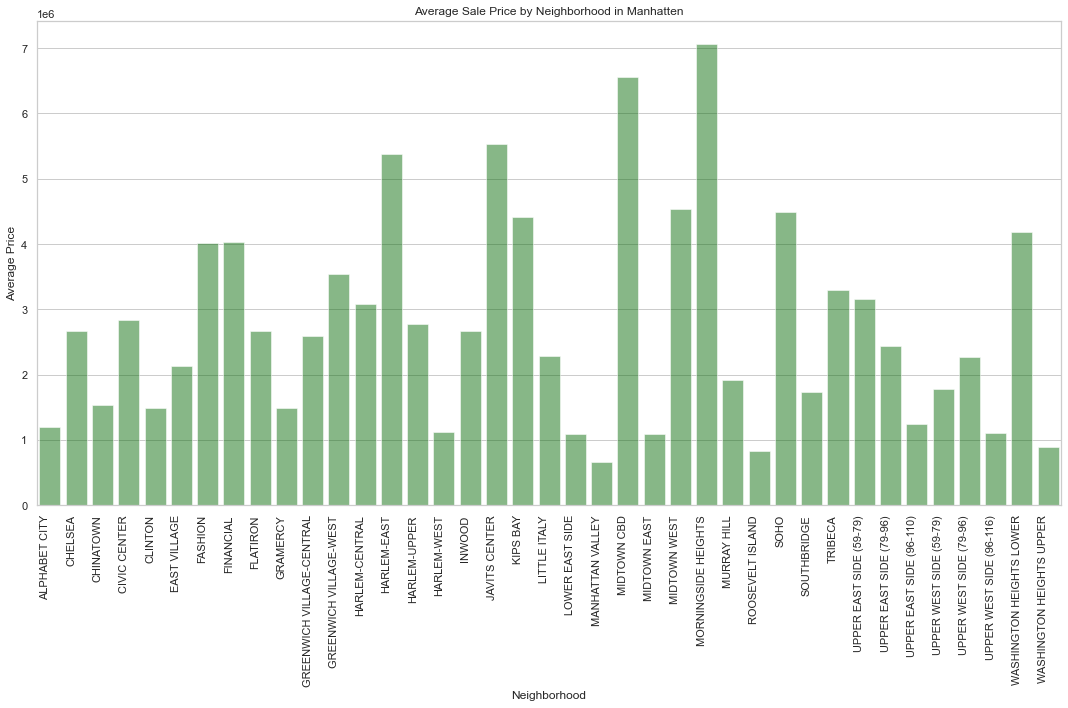

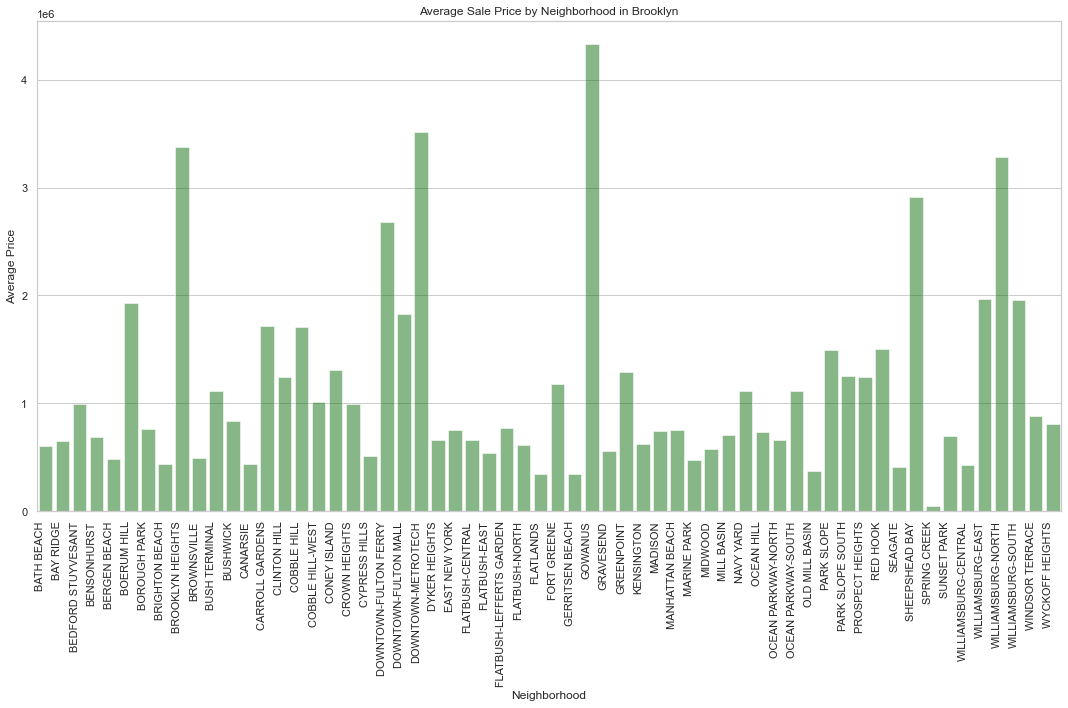

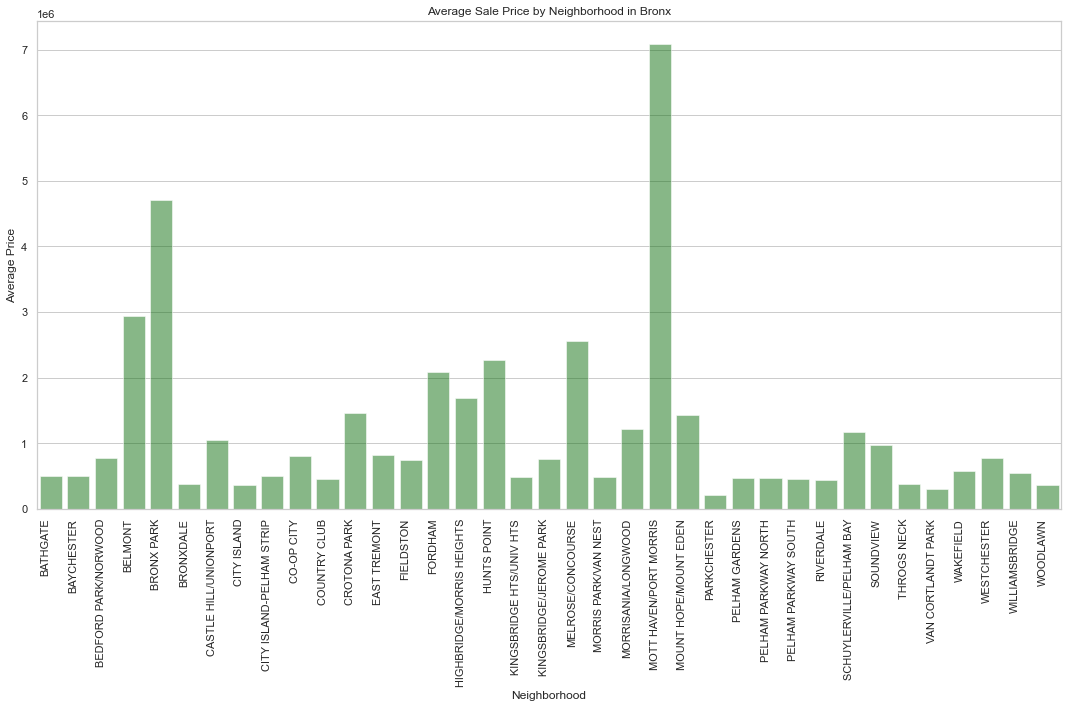

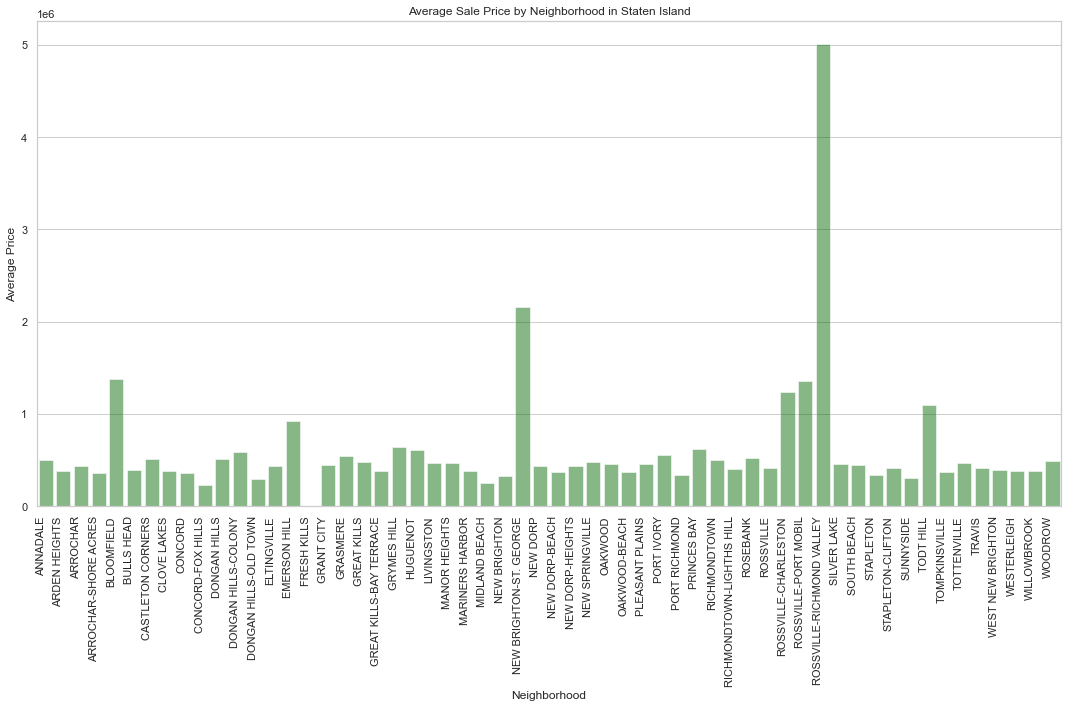

In [683]:
create_neighborhood_price_barplot(manhattan_df,'Manhatten')
create_neighborhood_price_barplot(brooklyn_df,'Brooklyn')
create_neighborhood_price_barplot(bronx_df,'Bronx')
create_neighborhood_price_barplot(staten_island_df,'Staten Island')

In [684]:
def create_year_build_price_lineplot(data, title):
    # Filter the data based on the year built and sale price conditions
    filtered_data = data[['YEAR BUILT', 'SALE PRICE']].dropna()
    filtered_data = filtered_data[(filtered_data['YEAR BUILT'] >= 1800) & (filtered_data['YEAR BUILT'] <= 2023) & (filtered_data['SALE PRICE'] > 1)] 
    
    # Group the filtered data by year built and calculate the mean sale price
    grouped_data = filtered_data.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

    # Create a line plot to visualize the relationship between year built and average sale price
    plt.figure(figsize=(15, 10))
    sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=grouped_data, color='blue', marker='o', markersize=5, linewidth=2)
    plt.title(f'Relationship between Price and Year Built in {title}', fontsize=16)
    plt.xlabel('Year Built', fontsize=14)
    plt.ylabel('Average Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

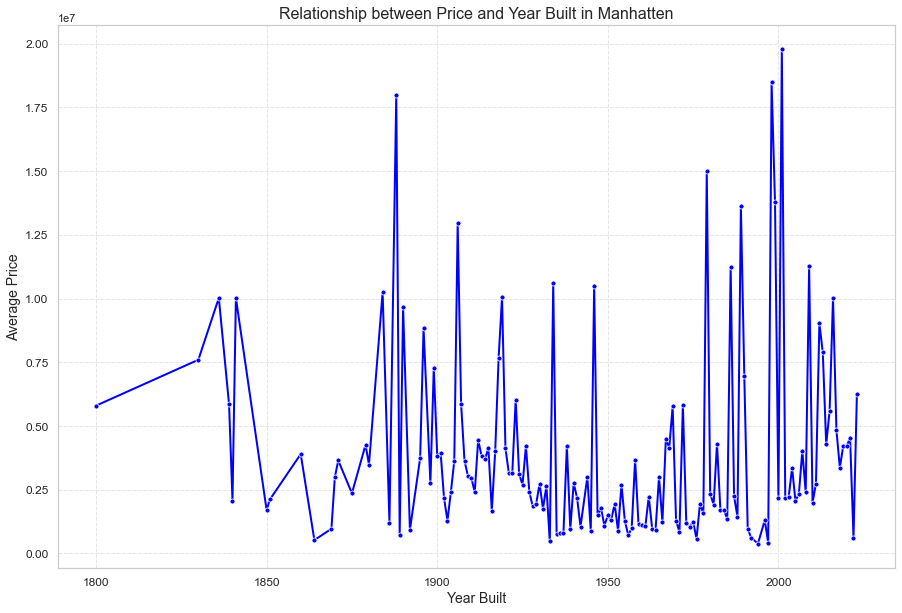

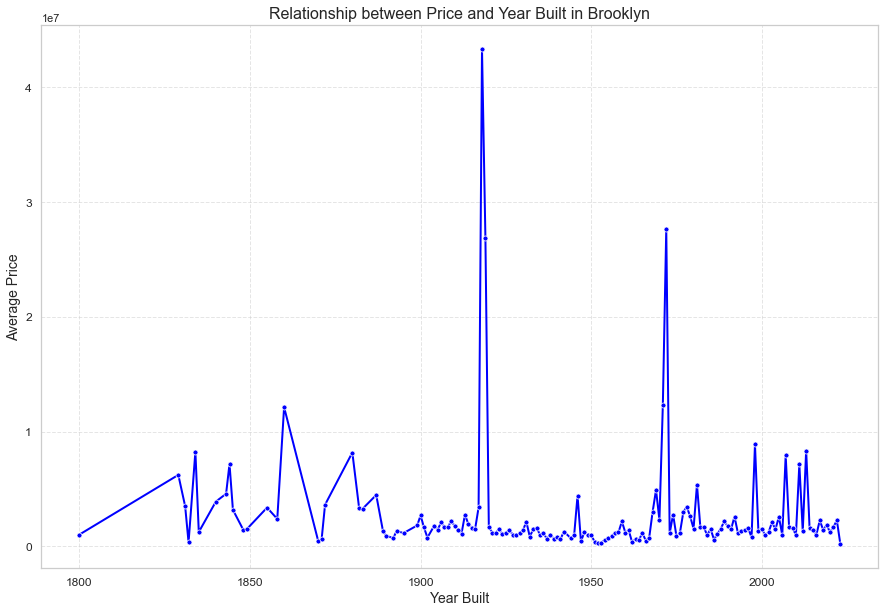

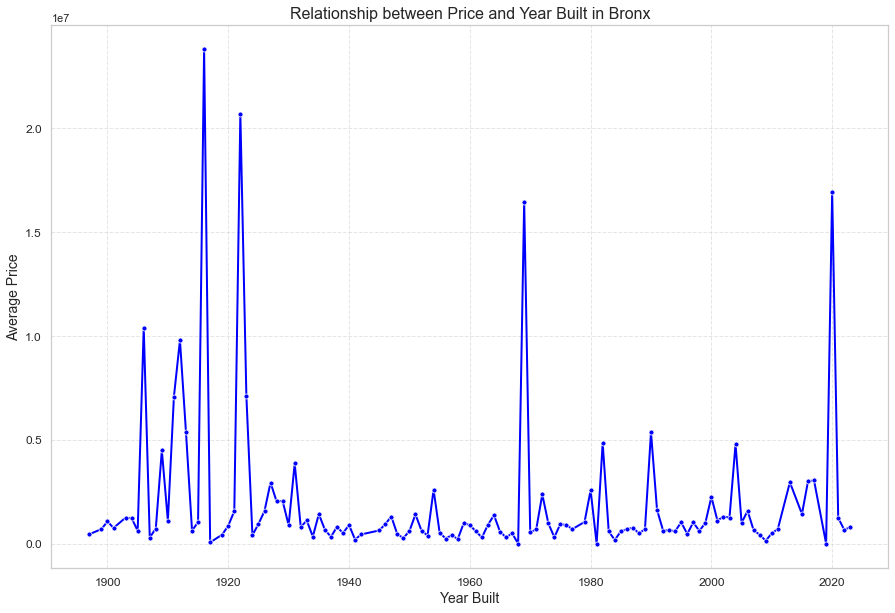

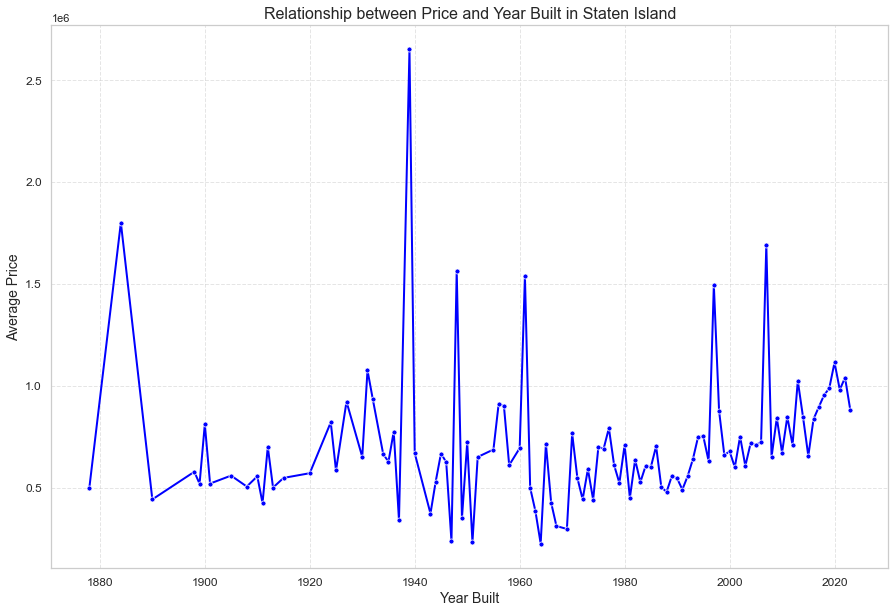

In [685]:
# Create line plots to visualize the relationship between year built and average sale price for different boroughs
create_year_build_price_lineplot(manhattan_df,'Manhatten')    
create_year_build_price_lineplot(brooklyn_df,'Brooklyn')    
create_year_build_price_lineplot(bronx_df,'Bronx')    
create_year_build_price_lineplot(staten_island_df,'Staten Island')

In [686]:
def create_year_price_line(data, title):
    # Filter the data based on the sale date and sale price conditions
    filtered_data = data[['SALE DATE', 'SALE PRICE']].dropna()
    filtered_data = filtered_data[(filtered_data['SALE DATE'].dt.year >= 1950) & (filtered_data['SALE DATE'].dt.year <= 2023) & (filtered_data['SALE PRICE'] > 1)] 
    
    # Group the filtered data by sale date and calculate the mean sale price
    avg_price = filtered_data.groupby('SALE DATE')['SALE PRICE'].mean().reset_index()
    
    # Create a line plot to visualize the change in prices over the years
    plt.figure(figsize=(15, 10))
    sns.lineplot(x=avg_price['SALE DATE'], y=avg_price['SALE PRICE'], marker='.', color='green', linewidth=2)
    plt.title(f'Change in Prices over the Years in {title}', fontsize=16)
    plt.xlabel('Year of Purchase', fontsize=14)
    plt.ylabel('Average Price', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

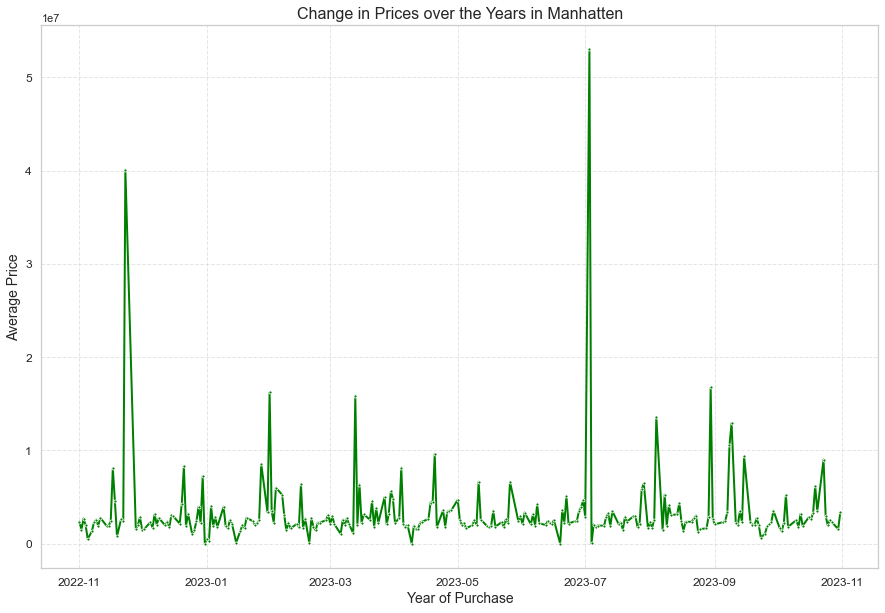

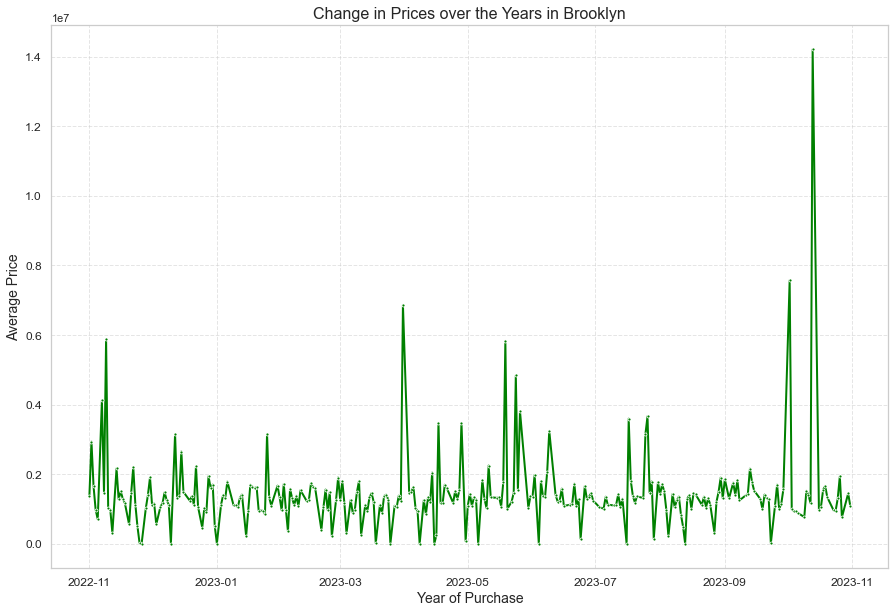

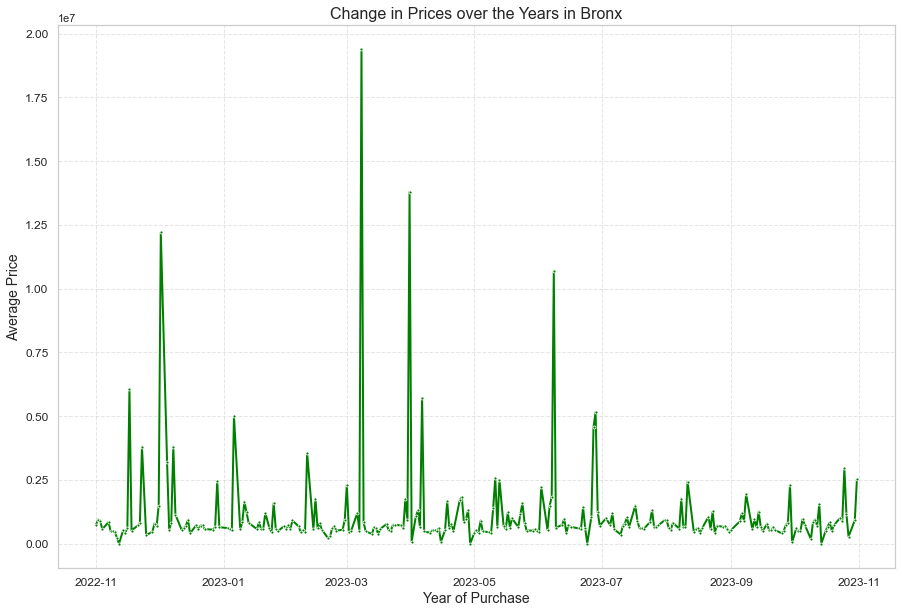

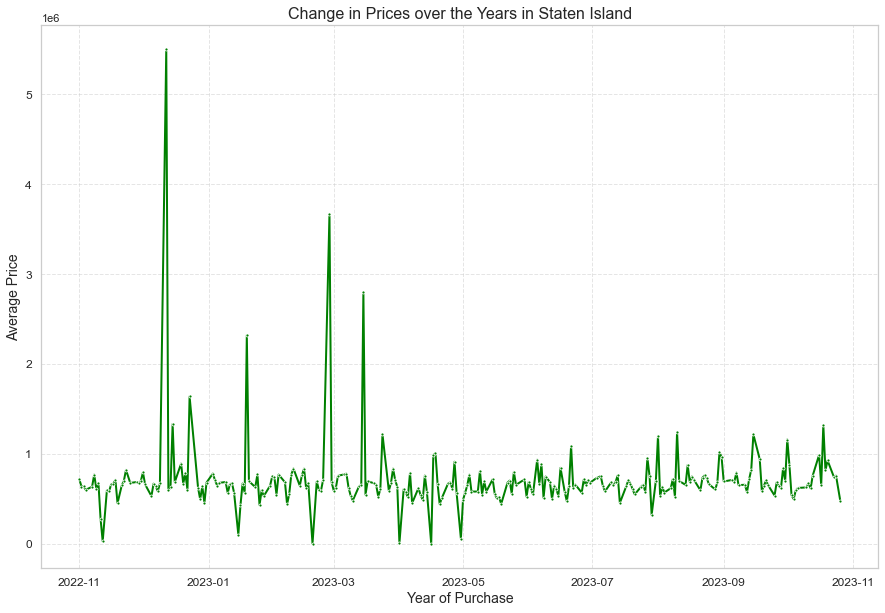

In [687]:
create_year_price_line(manhattan_df,'Manhatten')    
create_year_price_line(brooklyn_df,'Brooklyn')    
create_year_price_line(bronx_df,'Bronx')    
create_year_price_line(staten_island_df,'Staten Island')


In [688]:
def plot_building_type_by_year(data, title):
    filtered_data = data[(data['YEAR BUILT'] >= 1950) & (data['YEAR BUILT'] <= 2023)]
    plt.figure(figsize=(15, 10))
    sns.lineplot(x="YEAR BUILT", y="RESIDENTIAL UNITS", data=filtered_data, label="Residential Units", color="blue", linewidth=2)
    sns.lineplot(x="YEAR BUILT", y="COMMERCIAL UNITS", data=filtered_data, label="Commercial Units", color="green", linewidth=2)
    plt.title(f"Change in the Number of Residential and Commercial Units over the Years in {title}", fontsize=16)
    plt.xlabel("Year Built", fontsize=14)
    plt.ylabel("Number of Buildings", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

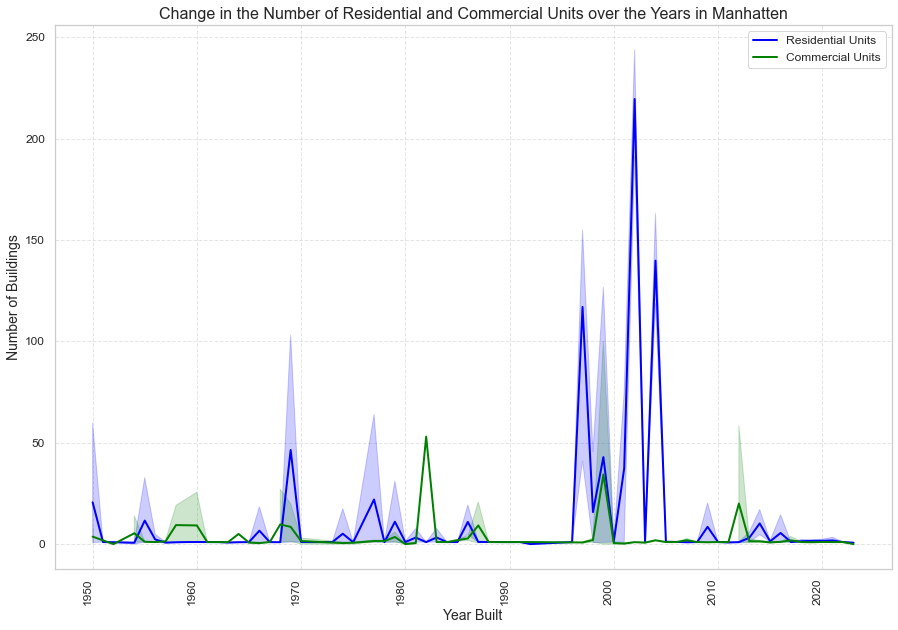

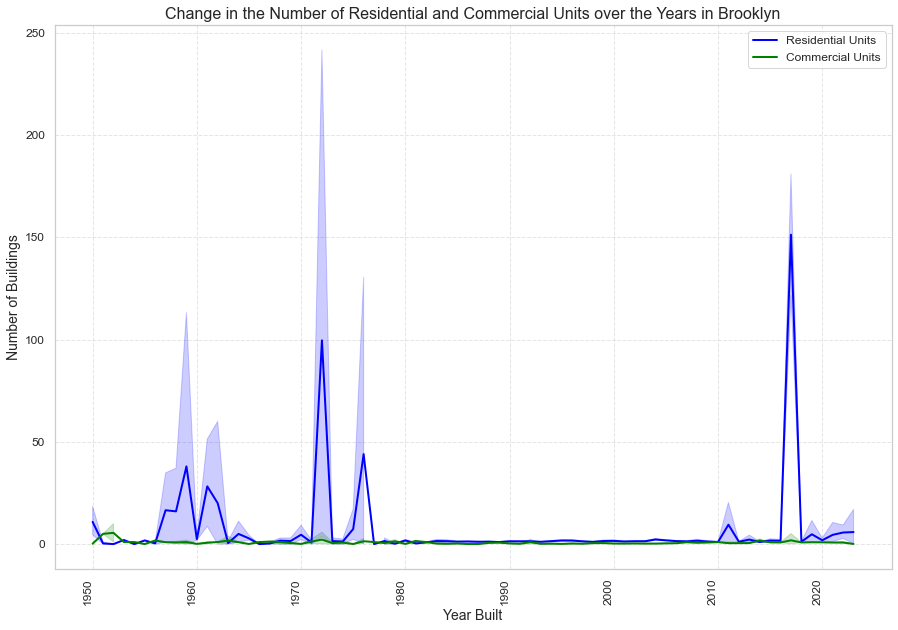

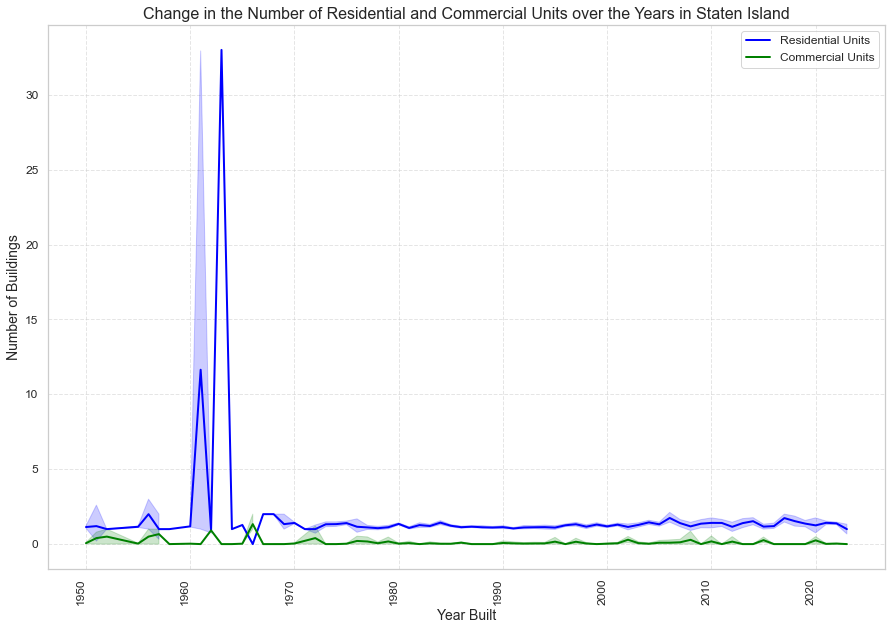

In [689]:
plot_building_type_by_year(manhattan_df,'Manhatten');
plot_building_type_by_year(brooklyn_df,'Brooklyn');
plot_building_type_by_year(staten_island_df,'Staten Island');


In [690]:
def plot_building_types_by_neighborhood(data, title):
    data = data[['NEIGHBORHOOD', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS']].dropna()
    grouped_data = data.groupby('NEIGHBORHOOD')[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS']].mean().reset_index()
    
    plt.figure(figsize=(15, 10))
    sns.barplot(x=grouped_data['NEIGHBORHOOD'], y=grouped_data['RESIDENTIAL UNITS'], alpha=0.5, color='blue', label='Residential')
    sns.barplot(x=grouped_data['NEIGHBORHOOD'], y=grouped_data['COMMERCIAL UNITS'], alpha=0.5, color='green', label='Commercial')
    plt.xticks(rotation=90, ha='right')  # Change the rotation angle to 90 degrees
    
    plt.title(f"Number of Residential and Commercial Units by Neighborhood in {title}")
    plt.xlabel("Neighborhood")
    plt.ylabel("Number of Buildings")
    plt.legend()
    
    plt.show()

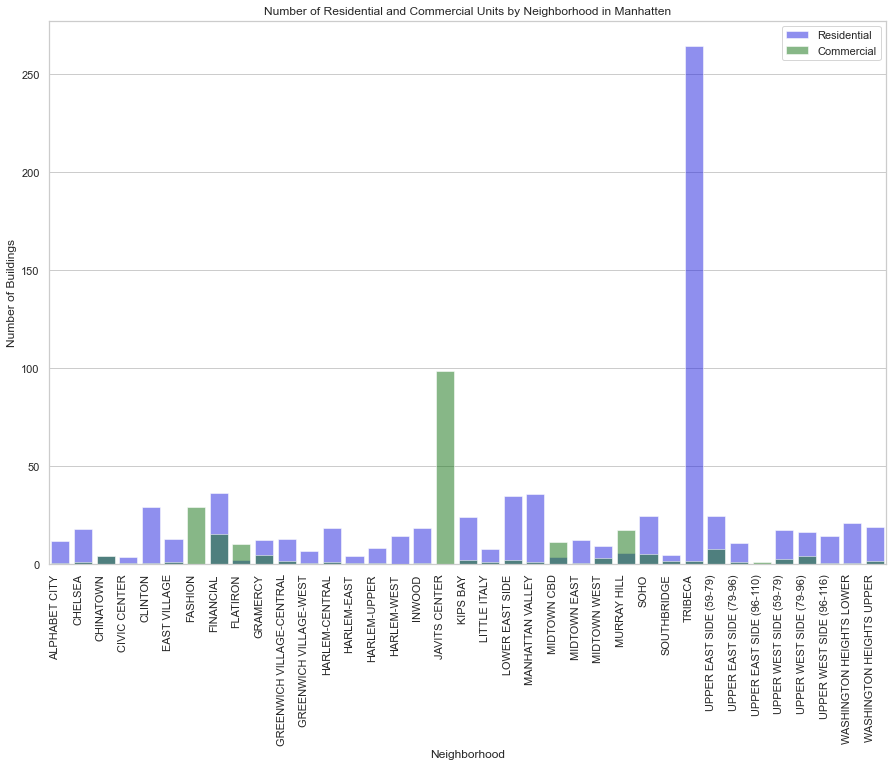

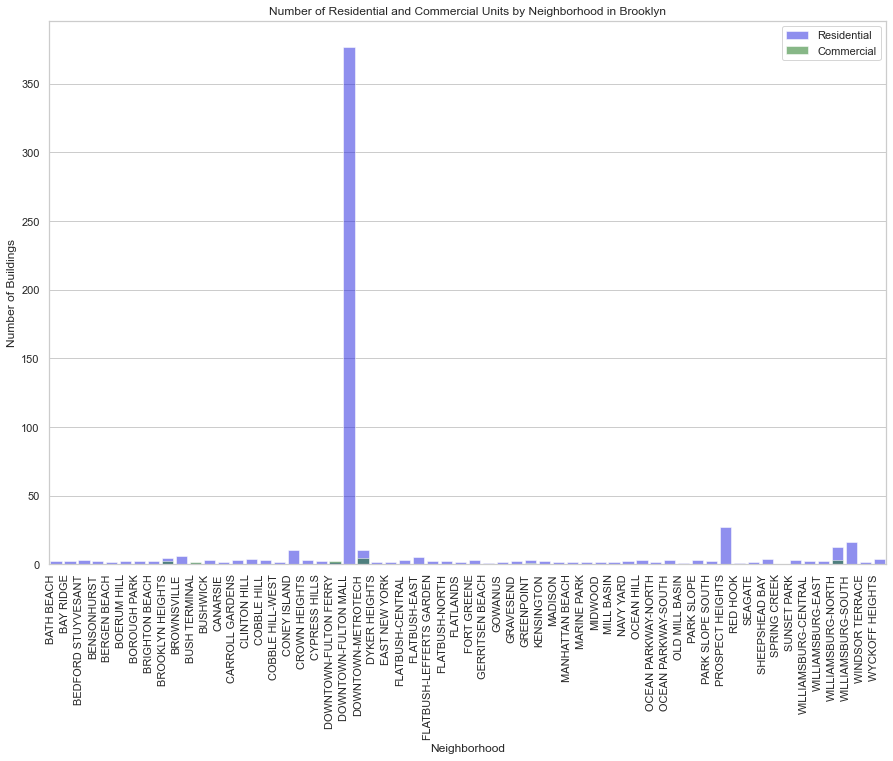

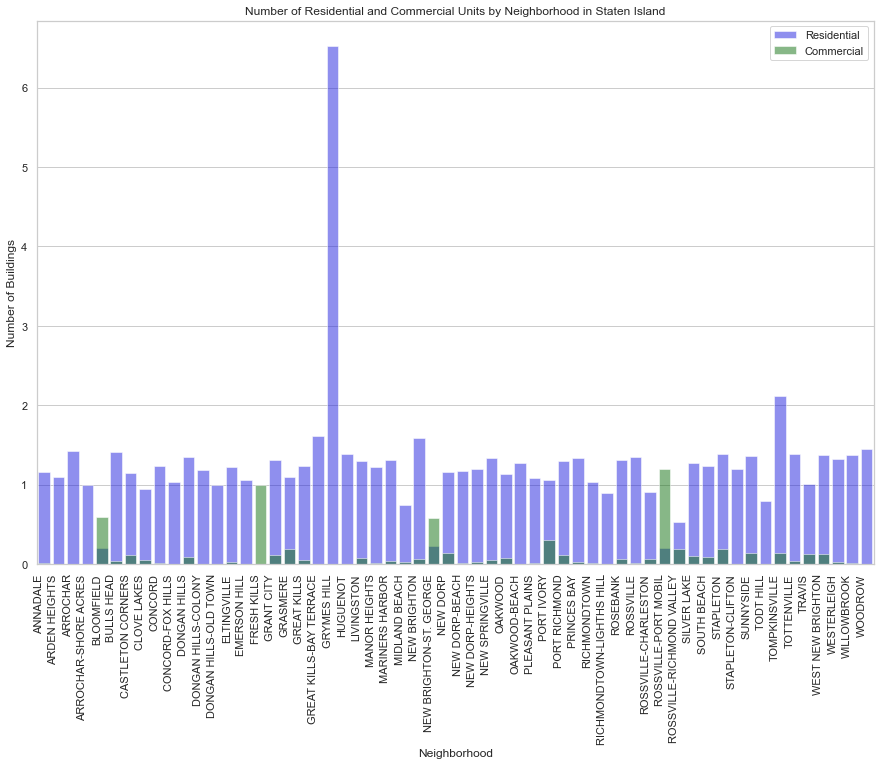

In [691]:
plot_building_types_by_neighborhood(manhattan_df,'Manhatten');
plot_building_types_by_neighborhood(brooklyn_df,'Brooklyn');
plot_building_types_by_neighborhood(staten_island_df,'Staten Island');


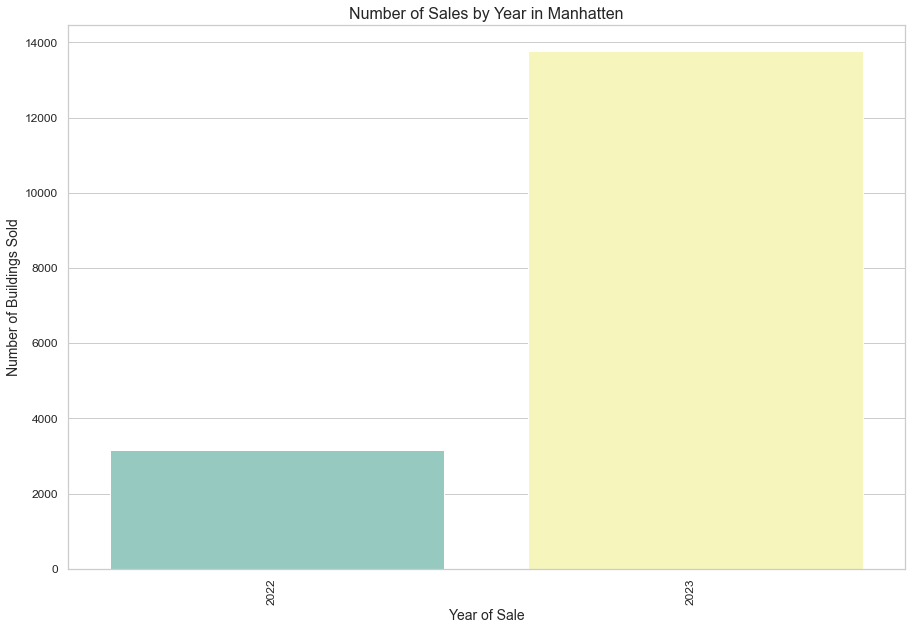

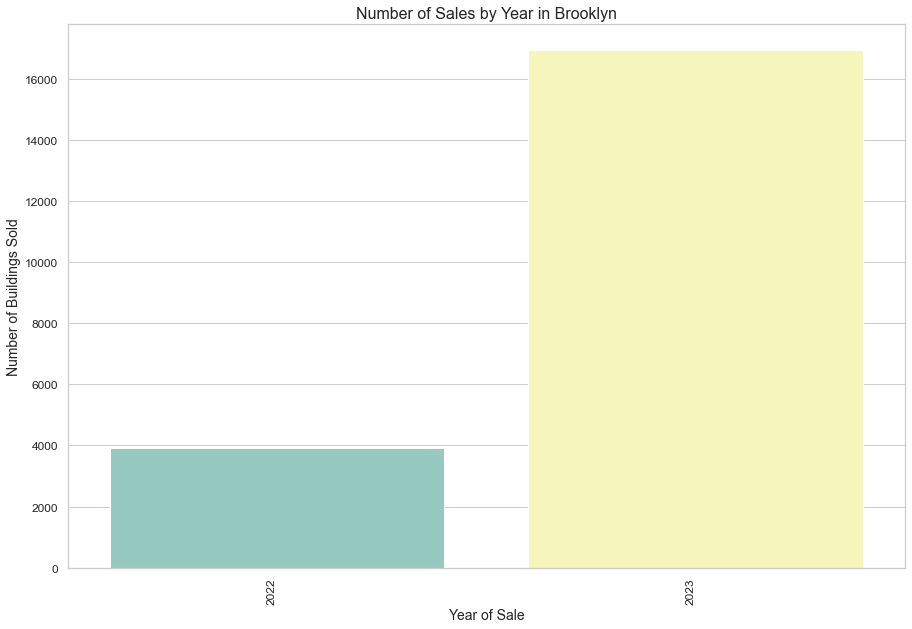

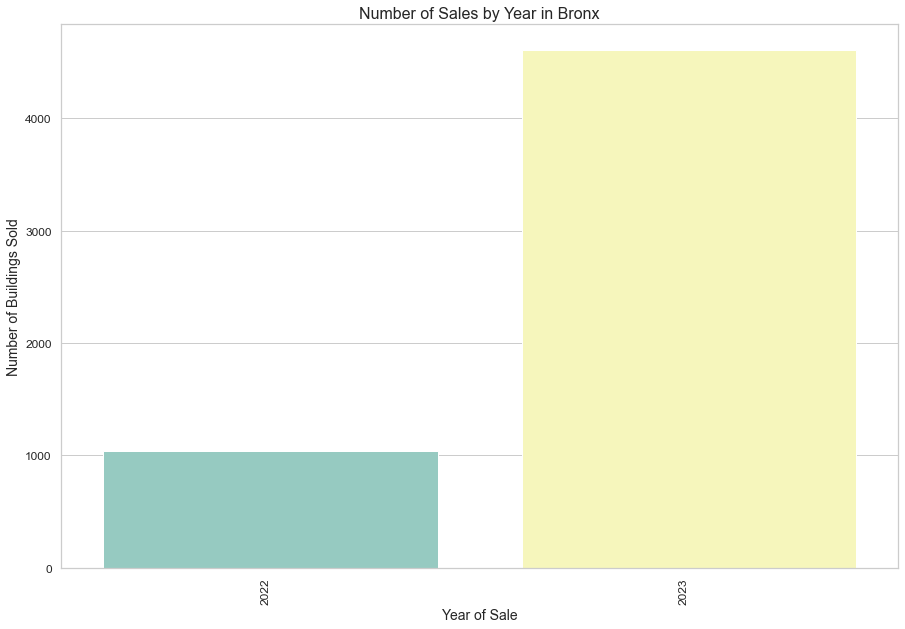

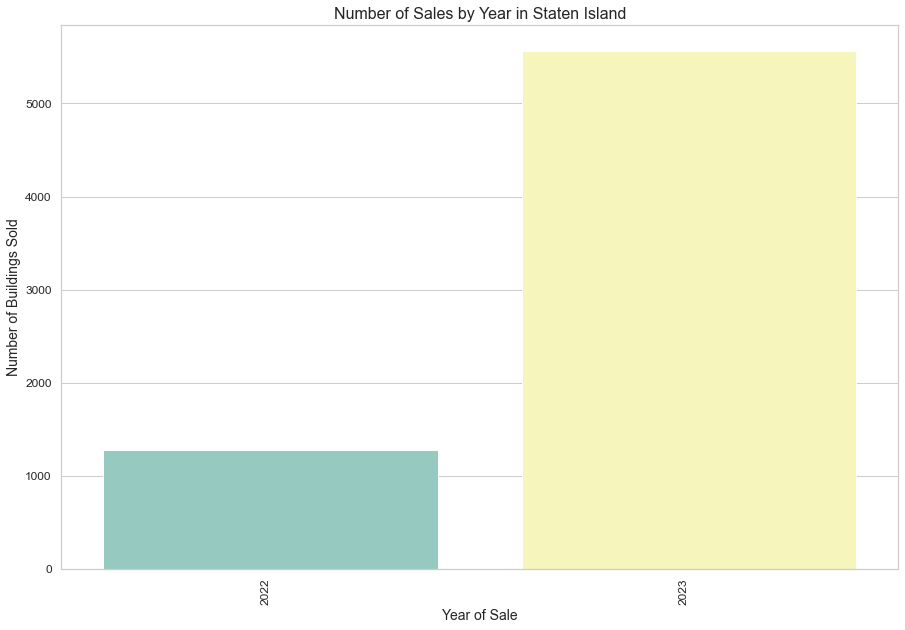

In [692]:
count_sales_by_year(manhattan_df,'Manhatten')    
count_sales_by_year(brooklyn_df,'Brooklyn')    
count_sales_by_year(bronx_df,'Bronx')    
count_sales_by_year(staten_island_df,'Staten Island')   

In [693]:
def count_sales_by_neighborhood(data, title):
    plt.figure(figsize=(15, 10))
    sns.countplot(x=data['NEIGHBORHOOD'], palette='Set3')  # Change the color palette to 'Set3'
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f'Number of Sales by Neighborhood in {title}', fontsize=16)
    plt.xlabel('Neighborhood', fontsize=14)
    plt.ylabel('Number of Buildings Sold', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines for better visibility
    plt.show()

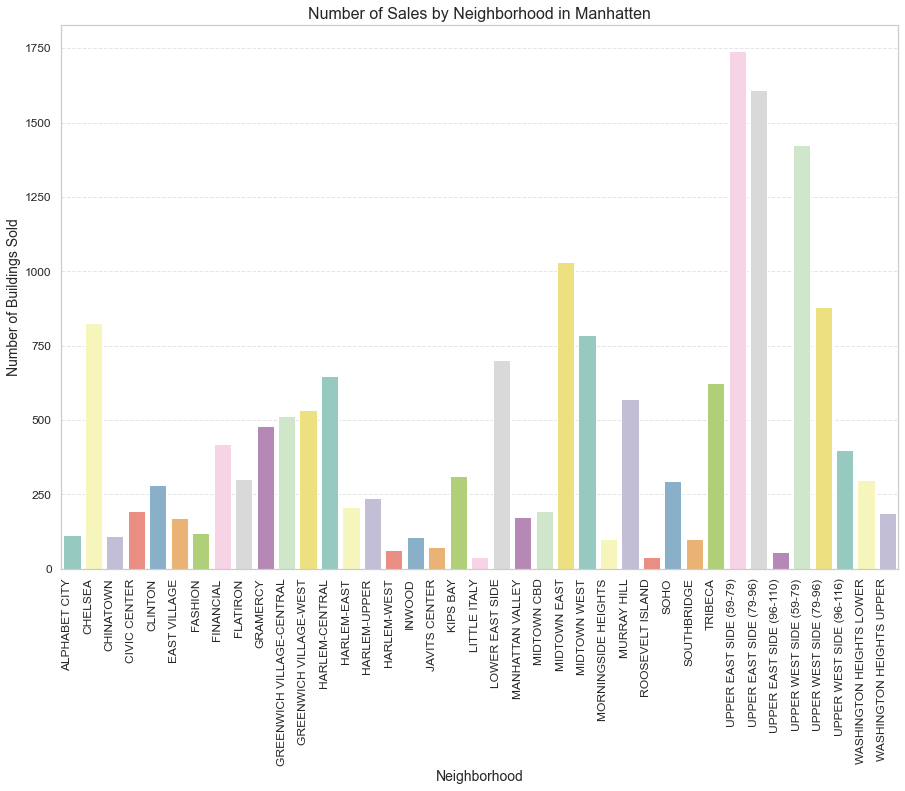

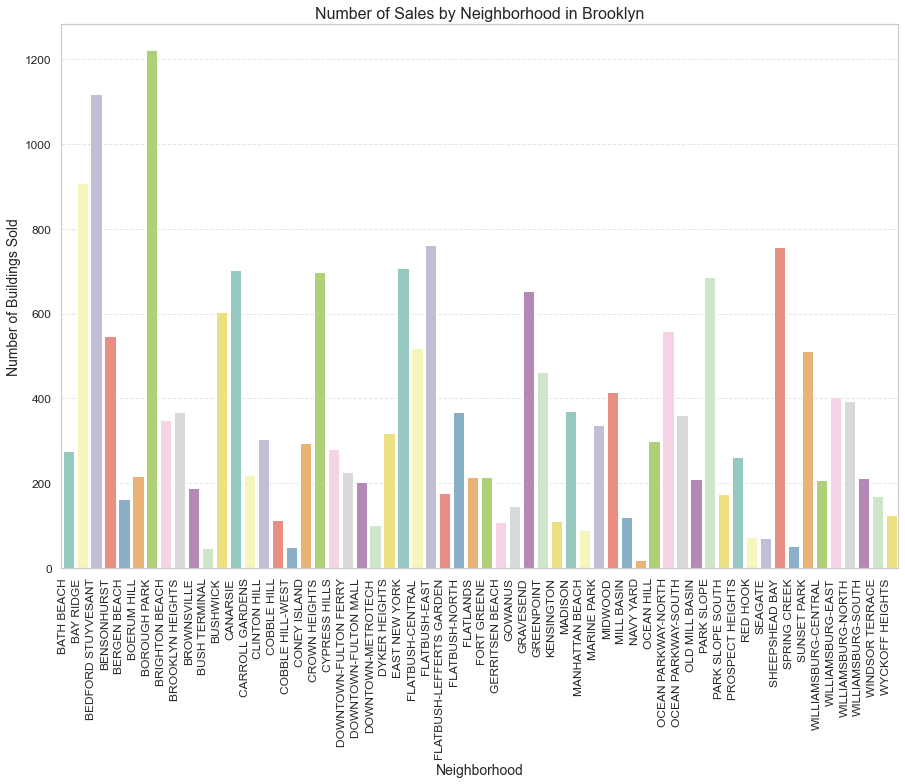

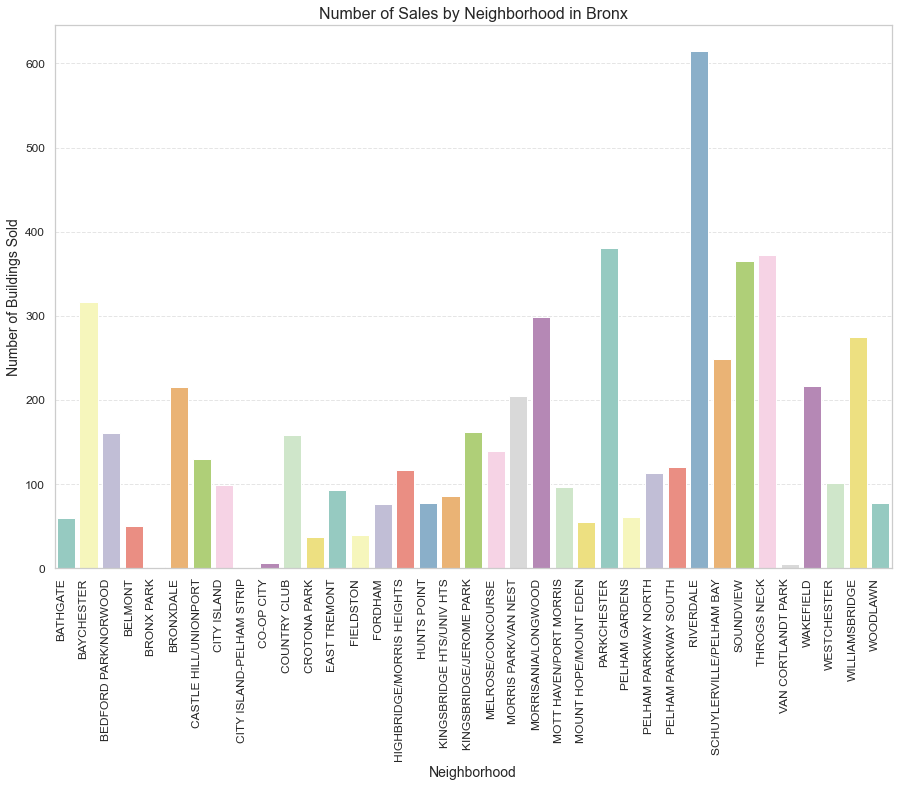

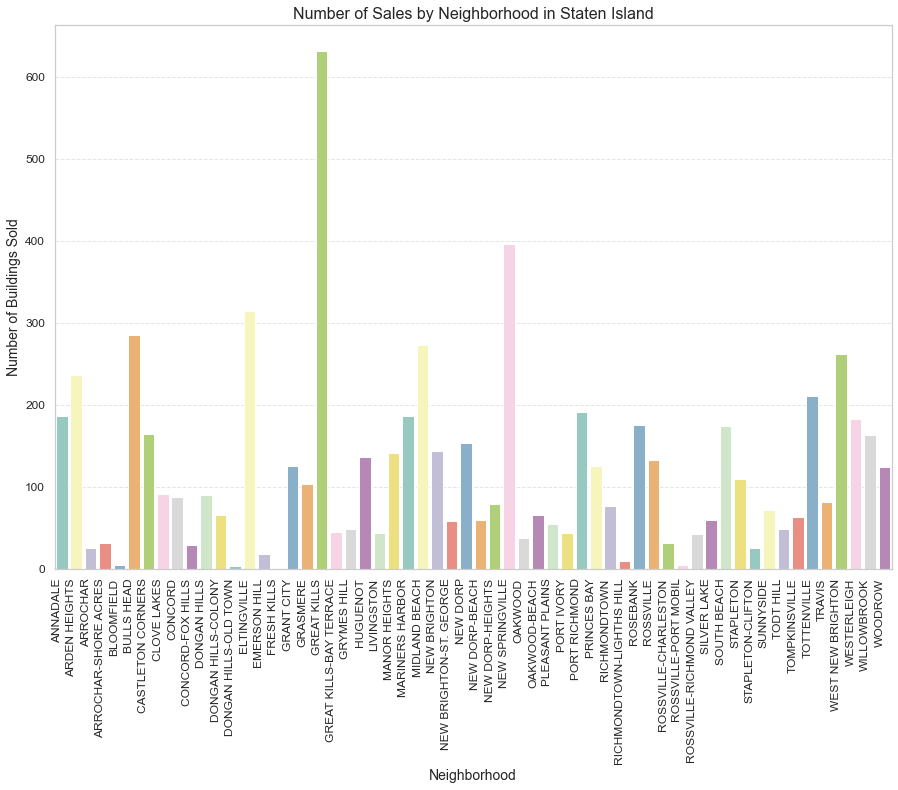

In [695]:
count_sales_by_neighborhood(manhattan_df,'Manhatten')    
count_sales_by_neighborhood(brooklyn_df,'Brooklyn')    
count_sales_by_neighborhood(bronx_df,'Bronx')    
count_sales_by_neighborhood(staten_island_df,'Staten Island')   